In [1]:
import json
annotations = json.load(open('data/annotations.json'))
print(type(annotations))

<class 'dict'>


In [2]:
print(annotations.keys())

dict_keys(['info', 'images', 'annotations', 'scene_annotations', 'licenses', 'categories', 'scene_categories'])


In [3]:
print(annotations['images'][1])

{'id': 1, 'width': 1537, 'height': 2049, 'file_name': 'batch_1/000008.jpg', 'license': None, 'flickr_url': 'https://farm66.staticflickr.com/65535/47803331152_ee00755a2e_o.png', 'coco_url': None, 'date_captured': None, 'flickr_640_url': 'https://farm66.staticflickr.com/65535/47803331152_19beae025a_z.jpg'}


In [4]:
print(annotations['annotations'][2])

{'id': 3, 'image_id': 1, 'category_id': 14, 'segmentation': [[617.0, 383.0, 703.0, 437.0, 713.0, 456.0, 725.0, 459.0, 747.0, 482.0, 760.0, 483.0, 780.0, 506.0, 794.0, 520.0, 807.0, 528.0, 827.0, 537.0, 835.0, 551.0, 852.0, 555.0, 882.0, 576.0, 913.0, 596.0, 929.0, 605.0, 954.0, 617.0, 972.0, 622.0, 998.0, 630.0, 1034.0, 640.0, 1051.0, 644.0, 1064.0, 632.0, 1081.0, 616.0, 1104.0, 589.0, 1121.0, 576.0, 1152.0, 566.0, 1177.0, 564.0, 1201.0, 569.0, 1231.0, 589.0, 1260.0, 613.0, 1277.0, 644.0, 1298.0, 669.0, 1318.0, 694.0, 1343.0, 724.0, 1362.0, 756.0, 1378.0, 779.0, 1389.0, 795.0, 1389.0, 801.0, 1398.0, 811.0, 1415.0, 821.0, 1427.0, 837.0, 1437.0, 848.0, 1450.0, 863.0, 1461.0, 872.0, 1469.0, 887.0, 1483.0, 898.0, 1495.0, 927.0, 1501.0, 949.0, 1506.0, 964.0, 1537.0, 917.0, 1536.0, 822.0, 1522.0, 790.0, 1512.0, 783.0, 1497.0, 768.0, 1479.0, 751.0, 1459.0, 738.0, 1428.0, 695.0, 1403.0, 653.0, 1370.0, 610.0, 1351.0, 589.0, 1342.0, 585.0, 1338.0, 570.0, 1328.0, 558.0, 1305.0, 532.0, 1276.0, 505

In [5]:
def get_image_path(image_id, images):
    for image_info in images:
        if image_info['id'] == image_id:
            return image_info['file_name']
    return None

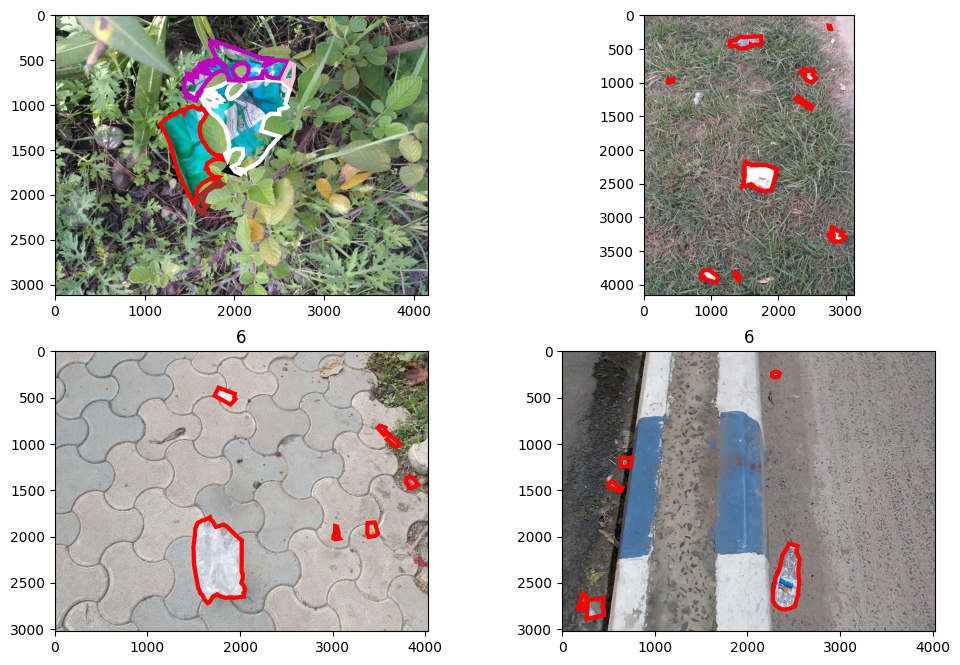

In [41]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image, ExifTags

annotations = json.load(open('annotations_modified.json'))

for orientation in ExifTags.TAGS.keys():
    if ExifTags.TAGS[orientation] == 'Orientation':
        break

numy, numx = 2, 2
offset = 357
fig, ax = plt.subplots(numy, numx, figsize=(12, 8))
for i in range(numx * numy):
    image_id = i + offset
    image_path = 'data/' + get_image_path(image_id, annotations['images'])

    image = Image.open(image_path)
    # if image._getexif():
    #     exif = dict(image._getexif().items())
    #     if orientation in exif:
    #         if exif[orientation] == 3:
    #             image = image.rotate(180, expand=True)
    #         elif exif[orientation] == 6:
    #             image = image.rotate(270, expand=True)
    #         elif exif[orientation] == 8:
    #             image = image.rotate(90, expand=True)

    image_annotations = [anno for anno in annotations['annotations'] if anno['image_id'] == image_id]

    ax[i // numx, i % numx].imshow(image)

    if image._getexif():
        exif = dict(image._getexif().items())
        if orientation in exif:
            ax[i // numx, i % numx].set_title(str(exif[orientation]), fontsize='large', loc='center')

    for anno in image_annotations:
        for segIndex, seg in enumerate(anno['segmentation']):
            width, height = image.size
            polygon = [(seg[i] * width, seg[i + 1] * height) for i in range(0, len(seg), 2)]
            polygon_patch = patches.Polygon(polygon, closed=True, edgecolor=['r', 'brown', 'k', 'w', 'm', 'pink', 'b'][min(segIndex, 6)], facecolor='none', linewidth=3)
            ax[i // numx, i % numx].add_patch(polygon_patch)

plt.show()


In [9]:
from PIL import Image, ExifTags
import json

annotations = json.load(open('annotations_modified.json'))

# Find the Exif orientation tag
for orientation in ExifTags.TAGS.keys():
    if ExifTags.TAGS[orientation] == 'Orientation':
        break

all = {}
eights = []

# Loop through each image
for image_info in annotations['images']:
    image_id = image_info['id']
    image_path = 'data/' + get_image_path(image_id, annotations['images'])

    image = Image.open(image_path)

    # Check if the image has Exif orientation tags
    if image._getexif():
        exif = dict(image._getexif().items())
        if orientation in exif:
            if exif[orientation] not in list(all.keys()):
                all[exif[orientation]] = 1
            else:
                all[exif[orientation]] += 1
            if exif[orientation] == 8:
                print(image_id)

print(all)

539
550
556
{6: 149, 1: 46, 0: 8, 8: 3, 3: 1}


In [39]:
from PIL import Image, ExifTags
import json
import copy

# Find the Exif orientation tag
for orientation in ExifTags.TAGS.keys():
    if ExifTags.TAGS[orientation] == 'Orientation':
        break

annotations = json.load(open('data/annotations.json'))

# Loop through each image
for image_info in annotations['images']:
    image_id = image_info['id']
    image_path = 'data/' + get_image_path(image_id, annotations['images'])

    # Load the image
    image = Image.open(image_path)

    # Check if the image has Exif orientation tags
    if image._getexif():
        exif = dict(image._getexif().items())
        if orientation in exif:
            width, height = image.size
            if exif[orientation] == 3:
                # Rotate the segmentation masks 180 degrees
                for anno in annotations['annotations']:
                    if anno['image_id'] == image_id:
                        for seg in anno['segmentation']:
                            for i in range(0, len(seg), 2):
                                seg[i] = width - seg[i]
                                seg[i + 1] = height - seg[i + 1]
            elif exif[orientation] == 8:
                # Rotate the segmentation masks 270 degrees clockwise
                for anno in annotations['annotations']:
                    if anno['image_id'] == image_id:
                        for seg in anno['segmentation']:
                            for i in range(0, len(seg), 2):
                                x, y = copy.deepcopy(seg[i]), copy.deepcopy(seg[i + 1])
                                seg[i] = width - y
                                seg[i + 1] = x
            elif exif[orientation] == 6:
                # Rotate the segmentation masks 90 degrees clockwise
                for anno in annotations['annotations']:
                    if anno['image_id'] == image_id:
                        for seg in anno['segmentation']:
                            for i in range(0, len(seg), 2):
                                x, y = copy.deepcopy(seg[i]), copy.deepcopy(seg[i + 1])
                                seg[i] = y
                                seg[i + 1] = height - x
    
    width, height = image.size
    for anno in annotations['annotations']:
        if anno['image_id'] == image_id:
            for seg in anno['segmentation']:
                for i in range(0, len(seg), 2):
                    seg[i] /= width
                    seg[i + 1] /= height

# Save the modified annotations back to the file
with open('annotations_modified.json', 'w') as f:
    json.dump(annotations, f)


In [35]:
import copy
annotations = json.load(open('annotations_modified.json'))

max = 0
maxID = 0
for ann in annotations['annotations']:
    if len(ann['segmentation']) != 1:
        print(ann['segmentation'])
        print(ann['image_id'], len(ann['segmentation']))
        if len(ann['segmentation']) > max:
            max = copy.deepcopy(len((ann['segmentation'])))
            maxID = copy.deepcopy((ann['image_id']))
print(max, maxID)

[[1118, 2027, 1142, 1988, 1143, 1958, 1136, 1949, 1111, 1951, 1096, 1942, 1097, 1927, 1124, 1892, 1148, 1889, 1089, 1837, 1147, 1847, 1253, 1879, 1315, 1888, 1363, 1888, 1391, 1884, 1422, 1889, 1457, 1895, 1494, 1901, 1522, 1906, 1510, 1955, 1493, 1987, 1482, 2003, 1425, 1928, 1407, 1916, 1386, 1892, 1369, 1897, 1417, 1955, 1472, 2018, 1504, 2053, 1491, 2081, 1453, 2108, 1401, 2112, 1363, 2083, 1300, 2017, 1180, 1920, 1154, 1896, 1140, 1909, 1200, 1959, 1267, 2018, 1258, 2060], [1090, 1788, 1105, 1774, 1115, 1741, 1149, 1723, 1168, 1699, 1184, 1679, 1213, 1666, 1322, 1710, 1372, 1756, 1362, 1787, 1384, 1804, 1431, 1806, 1488, 1862, 1387, 1849, 1330, 1837, 1254, 1757, 1248, 1769, 1299, 1826, 1278, 1835, 1159, 1816], [1269, 1636, 1308, 1616, 1349, 1589, 1378, 1551, 1402, 1568, 1417, 1569, 1439, 1597, 1450, 1625, 1424, 1636, 1436, 1656, 1446, 1693, 1492, 1724, 1527, 1771, 1529, 1792, 1496, 1784, 1382, 1717, 1295, 1664]]
106 3
[[568, 2006, 586, 2048, 612, 2101, 632, 2141, 686, 2175, 712, 2